# M√©todo de Euler

**Objetivo general**
- Realizar el seguimiento de un conjunto de part√≠culas dentro de un flujo usando el M√©todo de Euler hacia adelante.

**Objetivos particulares**
- Entender en qu√© consiste el flujo de Poiseuille.
- Calcular la trayectoria de una part√≠cula.
- Calcular la trayectoria de varias part√≠culas.
- Expresar el problema en t√©rminos de un Problema de Valor Inicial.

## Contenido
- [1. Flujo en una tuber√≠a.](#1)
- [2. C√°lculo de una sola trayectoria.](#2)
    - [2.1 Definici√≥n y graficaci√≥n del flujo. ](#2-1)
    - [2.2 Definici√≥n de la posici√≥n inicial de la part√≠cula y graficaci√≥n. ](#2-2)
    - [2.3 Seguimiento de la part√≠cula y graficaci√≥n de la trayectoria. ](#2-3)
        - [Ejercicio 1. Implementaci√≥n del M√©todo de Euler en 2D.](#ej-1)
        - [Ejercicio 2. Implementaci√≥n del M√©todo de Euler para varios pasos de tiempo.](#ej-2)
- [3. C√°lculo de varias trayectorias.](#3)
    - [3.1 Definici√≥n las posiciones iniciales. ](#3-1)
    - [3.2 Seguimiento de todas las part√≠culas. ](#3-2)
        - [Ejercicio 3. Implementaci√≥n del M√©todo de Euler para varias part√≠culas.](#ej-3)
        - [Ejercicio 4. Interactivo.](#ej-4)
- [4. Problemas de valor inicial.](#4)
- [5. Deducci√≥n de M√©todo de Euler (OPCIONAL).](#5)

In [1]:
# Importamos las bibliotecas necesarias
import matplotlib.pyplot as plt
import numpy as np
from macti.visual import plotFlujo, plotMalla
from macti.evaluacion import Evalua
»© = Evalua('MetodoEuler')

<a name='1'></a>
## Flujo en una tuber√≠a.
De acuerdo con la <a href="https://es.wikipedia.org/wiki/Ley_de_Poiseuille#C%C3%A1lculo_de_la_f%C3%B3rmula">Ley de Poiseuille</a> la velocidad de un l√≠quido incompresible y uniformemente viscoso (<a href="https://es.wikipedia.org/wiki/Fluido_newtoniano">fluido newtoniano</a>) a trav√©s de un tubo cil√≠ndrico de secci√≥n circular constante se puede calcular mediante la siguiente f√≥rmula

$$
u(r) =\left( \dfrac{\Delta p}{4 L \mu} \right)(R^2 - r^2) \tag{1}
$$

donde $\mu$ es la viscosidad din√°mica del fluido, $\Delta p$ representa la diferencia de presi√≥n entre dos puntos a lo largo del eje del cilindro, $L$ y $R$ representan la longitud y el radio del cilindro respectivamente. La ecuaci√≥n $(1)$ define a la velocidad $u$ como una funci√≥n de $r$, y esta √∫ltima es una variable que se mide desde desde el eje del cilindro en el intervalo $[0,R]$, v√©ase la siguiente figura:

<a title="Af3 at the Spanish language Wikipedia, CC BY-SA 3.0 &lt;http://creativecommons.org/licenses/by-sa/3.0/&gt;, via Wikimedia Commons" href="https://commons.wikimedia.org/wiki/File:Poiseuille.png"><img width="300" alt="Poiseuille" src="https://upload.wikimedia.org/wikipedia/commons/4/46/Poiseuille.png"></a>     

### Graficaci√≥n de la velocidad del flujo.

Observamos que la f√≥rmula $(1)$ representa una par√°bola.

* Primero definimos la f√≥rmula en una funci√≥n.

In [4]:
u = lambda r: ŒîP*(R**2 - r**2)/(4*L*Œº)  # Flujo de Poiseuille

* Definimos algunos datos para la f√≥rmula.

In [5]:
ŒîP = 0.298  # Diferencia de presiones
Œº = 1.05e-3 # Viscosidad del flujo
L = 3.0     # Longitud del tubo
R = 0.5     # Radio del tubo
print('Diferencia de presiones: {} \nViscosidad: {} \nLongitud: {} \nRadio: {}'.format(ŒîP,Œº,L,R))

Diferencia de presiones: 0.298 
Viscosidad: 0.00105 
Longitud: 3.0 
Radio: 0.5


* Evaluamos y graficamos la f√≥rmula.

**Nota**: En la figura de arriba observamos que la $r$ var√≠a en la direcci√≥n $y$ de los ejes Cartesianos.

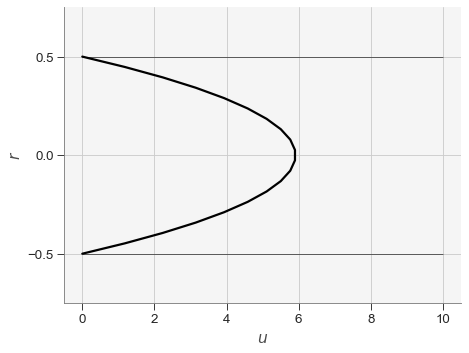

In [6]:
# Definici√≥n de r
r = np.linspace(-R,R,20)

# Evaluaci√≥n y graficaci√≥n de u(r)
plt.plot(u(r), r)

# Configuraci√≥n de la gr√°fica
plt.xlabel('$u$')
plt.ylabel('$r$')
plt.yticks([-R,0,R])
plt.ylim(-1.5*R,1.5*R)
plt.hlines([-R,R], xmin=0, xmax=10, lw=0.5)
plt.show()

### Velocidad del flujo en todo el tubo.

* Para dibujar la velocidad en todo el tubo definimos el siguiente conjunto de coordenadas:

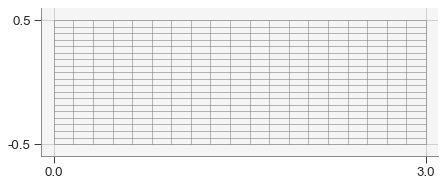

In [7]:
# Primero definimos las coordenadas en el eje x.
x = np.linspace(0, L, 20)

# Ahora definimos una malla en todo el tubo.
xg, yg = np.meshgrid(x, r, indexing='ij', sparse=False)

# Graficamos la malla.
plotMalla(xg,yg, marker='')

plt.show()

* Definici√≥n de la velocidad en la malla.

Dado que el dominio es bidimensional, la velocidad estar√° definida de la siguiente manera $\vec{V}(x,r) = \big( u(x,r), v(x,r) \big)$ donde:

$$
\begin{eqnarray}
u(x, r) & = & \left( \dfrac{\Delta p}{4 L \mu} \right)(R^2 - r^2) \\
v(x, r) & = & 0
\end{eqnarray}
$$


La implementaci√≥n de la velocidad es como sigue:

In [8]:
u = lambda x, r: ŒîP*(R**2 - r**2)/(4*L*Œº)  # Flujo de Poiseuille
v = lambda x, r: r*0                       # La velocidad en direcci√≥n vertical es cero.

En el c√≥digo anterior hemos usado funciones `lambda` de Python, una introducci√≥n se puede ver [aqu√≠](https://www.freecodecamp.org/news/python-lambda-function-explained/#:~:text=lambda%20is%20a%20keyword%20in,what%20you%20want%20to%20achieve). Observe que las funciones `lambda` definidas en la celda anterior, reciben los par√°metros `x` y `r`, de esta manera se eval√∫an `u` y `v` sobre toda la malla.

La gr√°fica del flujo en todo el tubo es la siguiente:

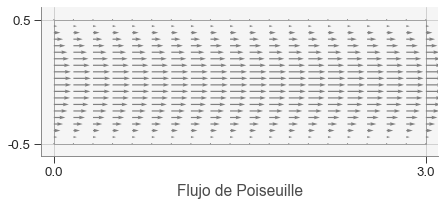

In [9]:
# Graficaci√≥n del campo de velocidades (u,v)
plotFlujo(xg, yg, u, v, 'quiver', 'Flujo de Poiseuille')

plt.show()

<a name='2'></a>
## C√°lculo de una sola trayectoria.

Supongamos que soltamos una part√≠cula en el punto $(x_i, y_i)$ dentro del cilindro del flujo de Poiseuille descrito arriba. **¬øHac√≠a donde se mover√° esa part√≠cula?**

Hagamos el siguiente an√°lisis:

1. Dada una part√≠cula $p$ ubicada dentro del flujo, su velocidad est√° dada por el vector $(u_p, v_p)$.

2. La velocidad de la part√≠cula en direcci√≥n $x$ se puede calcular con la f√≥rmula simple $u_p = \dfrac{\delta x}{\delta t}$, donde $\delta x$ es la distancia que recorre la part√≠cula en el tiempo $\delta t$.

3. De aqu√≠ sabemos que la distancia es $\delta x = \delta t * u_p$.

4. Si la part√≠cula se encuentra inicialmente en $x_i$ y despu√©s de un tiempo $\delta t$ llega al punto $x_f$, entonces la distancia recorrida ser√° $\delta x = x_f - x_i$. 

5. Por lo tanto, combinando las f√≥rmulas de 3. y 4., es f√°cil ver que el punto $x_f$ se obtiene con la siguiente f√≥rmula:

$$
x_f = x_i +  \delta t * u_p \tag{2}
$$

La ecuaci√≥n $(2)$ representa el **M√©todo de Euler** hacia adelante para aproximar la soluci√≥n de una Ecuaci√≥n Diferencial Ordinaria de primer orden.

Antes de revisar los detalles de este m√©todo veamos como podemos calcular las trayectorias de algunas part√≠culas usando la f√≥rmula $(2)$ y dibujarlas dentro del flujo.

Resolveremos el problema paso a paso. Primero para una part√≠cula haremos lo siguiente:

1. Definici√≥n del flujo y graficaci√≥n del flujo.
2. Definici√≥n de la posici√≥n inicial de la part√≠cula y graficaci√≥n.
3. Seguimiento de la part√≠cula dentro del flujo y graficaci√≥n de la trayectoria.

<a name='2-1'></a>
### Definici√≥n y graficaci√≥n del flujo.

Este punto lo hicimos antes, aqu√≠ solo repetimos los pasos realizados

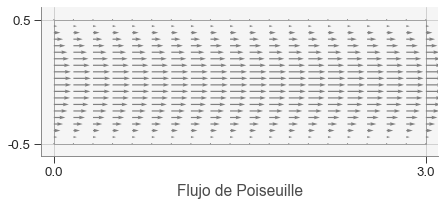

In [10]:
# Coordenadas Cartesianas
x = np.linspace(0,L,20)
r = np.linspace(-R,R,20)

# Generaci√≥n de la malla
xg, yg = np.meshgrid(x, r, indexing='ij', sparse=False)

# Campo de velocidad
u = lambda x,r: ŒîP*(R**2 - r**2)/(4*L*Œº)  # Flujo de Poiseuille
v = lambda x,r: r*0                       # La velocidad en direcci√≥n vertical es cero.

# Graficaci√≥n del campo de velocidades (u,v)
plotFlujo(xg, yg, u, v, 'quiver', 'Flujo de Poiseuille')

plt.show()

<a name='2-2'></a>
### Definici√≥n de la posici√≥n inicial de la part√≠cula y graficaci√≥n.

La posici√≥n inicial de la part√≠cula debe estar dentro del dominio de estudio, es decir dentro de $[0,L] \times [-R, R]$.

In [11]:
# Posici√≥n inicial de la part√≠cula
xi = 0.1 
yi = 0.0

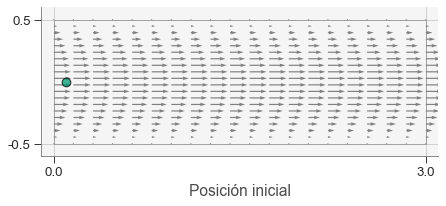

In [12]:
# Graficaci√≥n de la posici√≥n inicial de la part√≠cula
plt.scatter(xi, yi, fc='C3', ec='k', alpha=0.75, s=60, zorder=5)

# Graficaci√≥n del flujo.
plotFlujo(xg, yg, u, v, 'quiver', 'Posici√≥n inicial')

plt.show()

<a name='2-3'></a>
### Seguimiento de la part√≠cula y graficaci√≥n de la trayectoria.

A partir de la f√≥rmula $(2)$, que es el m√©todo de Euler hacia adelante, podemos calcular la siguiente posici√≥n de la part√≠cula aplicando dicha f√≥rmula a cada coordenada:

$$
\begin{eqnarray}
x_f & = & x_i + \delta t * u_p  \tag{3}\\
y_f & = & y_i + \delta t * v_p \\
\end{eqnarray}
$$

<a name='ej-1'></a>
#### **<font color="DodgerBlue">Ejercicio 1. Implementaci√≥n del M√©todo de Euler en 2D.</font>**

<font color="DarkBlue">Para la posici√≥n inicial $(x_i, y_i) = (0.1,0.0)$ y $t = 0.05$ calcule la posici√≥n final $(x_f, y_f)$ mediante las f√≥rmulas dadas en $(3)$.</font>

In [13]:
# Paso de tiempo
ùõøùë° = 0.05

# C√°lculo de la nueva posici√≥n usando el m√©todo de Euler
### BEGIN SOLUTION
xf = xi + ùõøùë° * u(xi, yi)
yf = yi + ùõøùë° * v(xi, yi)
### END SOLUTION

print('Posici√≥n inicial ({}, {})'.format(xi, yi))
print('Posici√≥n final ({},{})'.format(xf, yf))

Posici√≥n inicial (0.1, 0.0)
Posici√≥n final (0.3956349206349207,0.0)


In [14]:
»©.verifica(np.array([xf, yf]), 1)

¬°Tu resultado es correcto!


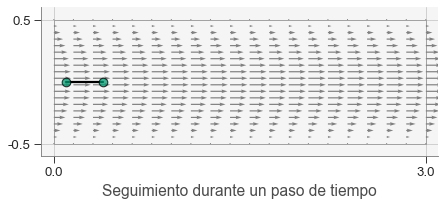

In [15]:
# Graficaci√≥n del punto inicial y del punto final.
plt.scatter([xi, xf], [yi, yf], fc='C3', ec='k', alpha=0.75, s=60, zorder=5)

# Graficaci√≥n de la trayectoria.
plt.plot([xi, xf], [yi, yf],'-k')

# Graficaci√≥n del flujo.
plotFlujo(xg, yg, u, v, 'quiver', 'Seguimiento durante un paso de tiempo')

plt.show()

En el c√°lculo anterior, se realiz√≥ el seguimiento durante **un solo paso de tiempo** y definimos el paso de tiempo $\delta t$ igual a $0.05$. 

Para calcular varios pasos de tiempo debemos definir lo siguiente:

1. El n√∫mero de pasos que deseamos calcular $N_t$.
2. Definir un arreglo para almacenar las coordenadas de la trayectoria en cada paso.
3. Realizar un ciclo de c√°lculo que permita ir calculando la trayectoria con el m√©todo de Euler hacia adelante.

El siguiente algoritmo describe los pasos a realizar:
<center>
<img src="../utils/figs/algTrayectoria01.png"  width='400px'/>
</center>

En el algoritmo anterior estamos usando $h_t$ como paso de tiempo.

<a name='ej-2'></a>
#### **<font color="DodgerBlue">Ejercicio 2. Implementaci√≥n del M√©todo de Euler para varios pasos de tiempo.</font>**

<font color="DarkBlue">Tomando en cuenta el algoritmo 1, complete el c√≥digo que sigue agregando las f√≥rmulas correspondientes al M√©todo de Euler hacia adelante para cada coordenada.</font>

In [16]:
# N√∫mero de pasos de tiempo.
Nt = 5  
ùõøùë° = 0.05

# Posici√≥n inicial de la part√≠cula
xi = 0.1  
yi = 0.0

# Definimos el arreglo para almacenar las posiciones
c = np.zeros((Nt, 2))
c[0] = (xi, yi)

for n in range(1, Nt): # Ciclo para calcular las posiciones
    ### BEGIN SOLUTION
    xf = xi + ùõøùë° * u(xi,yi) # F√≥rmula de Euler para x
    yf = yi + ùõøùë° * v(xi,yi) # F√≥rmula de Euler para y
    ### END SOLUTION
    c[n] = (xf, yf)         # Agregamos (xf, yf) a la lista de posiciones
    (xi, yi) = (xf, yf)     # Actualizamos (xi, yi)
    
print('Posiciones de la trayectoria\n {}'.format(c))

Posiciones de la trayectoria
 [[0.1        0.        ]
 [0.39563492 0.        ]
 [0.69126984 0.        ]
 [0.98690476 0.        ]
 [1.28253968 0.        ]]


In [17]:
»©.verifica(c, 2)

¬°Tu resultado es correcto!


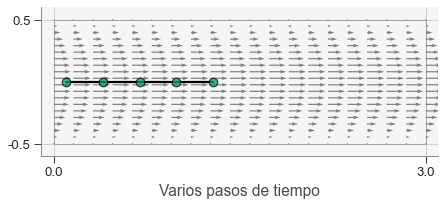

In [22]:
# Graficaci√≥n del punto inicial, la trayectoria y el campo de velocidades
plt.scatter(c[:,0], c[:,1], fc='C3', ec='k', alpha=0.75, s=60, zorder=5)
plt.plot(c[:,0], c[:,1],'-k')
plotFlujo(xg, yg, u, v, 'quiver', 'Varios pasos de tiempo')
plt.show()

<a name='3'></a>
## C√°lculo de varias trayectorias.

Para calcular varias trayectorias haremos lo siguiente.

<a name='3-1'></a>
### Definici√≥n de las posiciones iniciales.

Primero se deben definir las posiciones iniciales de $N_p$ part√≠culas y graficarlas:

Posiciones iniciales 
 px = [0. 0. 0. 0. 0. 0. 0.] 
 py = [-0.4        -0.26666667 -0.13333333  0.          0.13333333  0.26666667
  0.4       ]


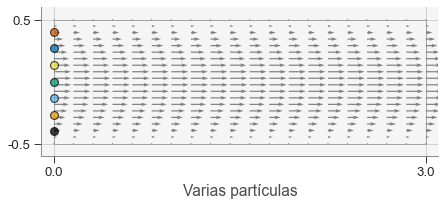

In [23]:
# N√∫mero de part√≠culas
Np = 7

# Coordenadas iniciales de las part√≠culas
px = np.zeros(Np)
py = np.linspace(-0.4, 0.4, Np) # Equiespaciadas en direcci√≥n y

print('Posiciones iniciales \n px = {} \n py = {}'.format(px, py))

# Graficaci√≥n de las posiciones iniciales
for i in range(Np):
    plt.scatter(px[i], py[i], ec='k', alpha=0.75, s=50, zorder=5)

plotFlujo(xg, yg, u, v, 'quiver', 'Varias part√≠culas')
plt.show()

<a name='3-2'></a>
### Seguimiento de todas las part√≠culas.

Ahora realizamos el seguimiento de cada part√≠cula y dibujamos su trayectoria usando el siguiente algoritmo:
<center>
<img src="../utils/figs/algTrayectoria02.png"  width='400px'/>
</center>

<a name='ej-3'></a>
#### **<font color="DodgerBlue">Ejercicio 3. Implementaci√≥n del M√©todo de Euler para varias part√≠culas.</font>**

<font color="DarkBlue">Tomando en cuenta el algoritmo 2, complete el c√≥digo siguiente para calcular las trayectorias de $7$ part√≠culas usando como posiciones iniciales los arreglos `px = [0. 0. 0. 0. 0. 0. 0.]` y `py = [-0.4 -0.26666667 -0.13333333 0. 0.13333333 0.26666667 0.4]` calculados anteriormente. Use tambi√©n los valores `Nt = 10` y `ht = 0.05`.</font>

In [20]:
Nt = 10
ht = 0.05
t = np.zeros((Np, Nt,2))

for j in range(0, Np):
    t[j, 0, :] = (px[j], py[j]) 

for j in range(0,Np):
    (xi, yi) = t[j, 0, :] # Posici√≥n inicial de la trayectoria j
    for n in range(1, Nt): # Ciclo para calcular las posiciones
        ### BEGIN SOLUTION
        xf = xi + ùõøùë° * u(xi,yi) # F√≥rmula de Euler para x
        yf = yi + ùõøùë° * v(xi,yi) # F√≥rmula de Euler para y
        t[j, n, :] = (xf, yf)   # Agregamos (xf, yf) a la lista de posiciones
        (xi, yi) = (xf, yf)     # Actualizamos (xi, yi)
        ### END SOLUTION
print(' N√∫mero de pasos: {} \n Paso de tiempo: {} \n N√∫mero de part√≠culas: {}'.format(Nt, ht, Np))

 N√∫mero de pasos: 10 
 Paso de tiempo: 0.05 
 N√∫mero de part√≠culas: 7


In [21]:
»©.verifica(t, 3)

¬°Tu resultado es correcto!


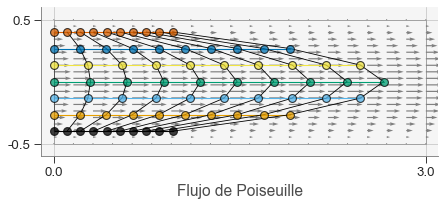

In [24]:
# Graficaci√≥n de todas las trayectorias y del flujo
for j in range(Np):
    plt.scatter(t[j,:,0], t[j,:,1],  ec='k', s=50, alpha=0.75, zorder=5)
    plt.plot(t[j,:,0], t[j,:,1],'-', lw=1.0)
plt.plot(t[:,:,0], t[:,:,1], '-k', lw=0.75)
plotFlujo(xg, yg, u, v, 'quiver', 'Flujo de Poiseuille')
plt.show()

<a name='ej-4'></a>
#### **<font color="DodgerBlue">Ejercicio 4. Interactivo.</font>**

- <font color="DarkBlue">Ejecute la siguiente celda para obtener un simulador en donde puede variar algunos par√°metros para graficar un flujo y las trayectorias de varias part√≠culas.</font> 

In [25]:
%run "../utils/src/zFlujo_interactive.ipynb"

interactive(children=(IntSlider(value=20, description='Nt', max=50, min=10, step=5), FloatSlider(value=0.02, d‚Ä¶

<a name='4'></a>
## Problema de Valor Inicial (PVI)
El problema de calcular la posici√≥n $x_f$ a partir de una posici√≥n inicial $x_i$, una velocidad $v$ y un paso de tiempo $t$, se puede escribir en t√©rminos de un problema de valor inicial bien planteado (PVI). 

Sabemos que la velocidad es el cambio de la posici√≥n con respecto al tiempo, es decir: 

$$v(x,t) = \dfrac{d x}{d t}$$

Entonces, en t√©rminos de un PVI, el c√°lculo de la posici√≥n $x$ se puede escribir como sigue:

Aproximar $x(t)$ al problema:
$$
\begin{eqnarray}
\dfrac{d x}{d t} & = & v(t, x) \qquad \text{ para }  t \in [0,T_{max}] \\
x(t=0) & = & x_i \qquad \text{(posici√≥n inicial)}
\end{eqnarray}
$$

En general, en un PVI se busca la soluci√≥n de una ecuaci√≥n diferencial ordinaria, en donde se debe satisfacer una condici√≥n inicial y se expresa como sigue:

---
Aproximar $y(t)$ al problema:
$$
\begin{eqnarray}
\dfrac{d y}{d t} & = & f(t, y) \qquad \text{ para } a < t < b \\
y(t=a) & = & \alpha \qquad \text{(condici√≥n inicial)}
\end{eqnarray}
$$

donde la funci√≥n $f(t,y)$ debe satisfacer ciertas condiciones de continuidad para que exista una soluci√≥n $y(t)$ √∫nica.

---

<a name='5'></a>
## Deducci√≥n del m√©todo de Euler (hacia adelante)

El m√©todo de Euler (hacia adelante) permite obtener soluciones aproximadas a un PVI, es decir una aproximaci√≥n a la funci√≥n $y(t)$. Para obtener este m√©todo definimos lo siguiente:
* $N_t$: n√∫mero de pasos de tiempo igualmente espaciados en $[a,b]$.
* Tama√±o de paso: $h_t = \dfrac{(b‚àía)}{N_t}$.
* Pasos de tiempo: $t_n = a + n ‚àóh_t$ para $n = 0,1,...,N_t$.

Supongamos que el PVI tiene una soluci√≥n √∫nica $y(t)$ y que adem√°s tiene al menos dos derivadas continuas en $[a,b],$ de tal manera que para cada $n = 0,1,2, \dots , N_t-1$ tenemos la siguiente expansi√≥n en series de Taylor:

$$
y(t_{n+1}) = y(t_n) + (t_{n+1} - t_n)  \dfrac{d y}{d t} (t_n) + \dfrac{(t_{n+1} - t_n)^2}{2} \dfrac{d^2 y}{d t^2} (\xi_n)
$$

para alg√∫n n√∫mero $\xi_n \in (t_n - t_{n+1})$.

Dado que $y(t)$ satisface la ecuaci√≥n diferencial del PVI y como $h_t = (t_{n+1} - t_n) $ entonces podemos escribir:

$$
\begin{equation}
y(t_{n+1}) = y(t_n) + h_t  \, f(t_n, y(t_n)) + \dfrac{h_t^2}{2} y^{\prime \prime} (\xi_n)
\end{equation}
$$

El m√©todo de Euler hacia adelante (*forward*) consiste en eliminar el √∫ltimo t√©rmino de la ecuaci√≥n anterior de tal manera que, definiendo $y_n \equiv y(t_n)$ tenemos lo siguiente

$$
\begin{eqnarray}
y_0 & = & y(a) = \alpha \qquad \text{(condici√≥n inicial)}\nonumber \\
y_{n+1} & = & y_n + h_t \, f(t_n, y_n), \text{ para } n = 0,1,2, \dots, N_t - 1 \tag{2}
\end{eqnarray}
$$

La ecuaci√≥n ($2$) proporciona una aproximaci√≥n a la soluci√≥n del PVI en el paso $t_{n+1}$ y se conoce como la ecuaci√≥n en diferencias.

Este m√©todo:

* Obtiene una soluci√≥n num√©rica, con una aproximaci√≥n de primer orden: $\mathcal{O}(h_t)$
* Es expl√≠cito.
* Es barato.
* Es f√°cil de implementar.
* Es condicionalmente estable.